**Importing Libraries**

In [ ]:
#importing Libraries for exploring and Visualize Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Data wrangling**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MLProject/climate-ds.csv',index_col=0)
df.head()

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
0,Albania,Maize,1990,1485,121.0,16.37,36613
1,Albania,Potatoes,1990,1485,121.0,16.37,66667
2,Albania,"Rice, paddy",1990,1485,121.0,16.37,23333
3,Albania,Sorghum,1990,1485,121.0,16.37,12500
4,Albania,Soybeans,1990,1485,121.0,16.37,7000


In [ ]:
df.shape

(28242, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   average_rain_fall_mm_per_year  28242 non-null  int64  
 4   pesticides_tonnes              28242 non-null  float64
 5   avg_temp                       28242 non-null  float64
 6   hg/ha_yield                    28242 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 1.7+ MB


In [ ]:
#some statistical information about data
df.describe()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
count,28242.000000,28242.00000,28242.000000,28242.000000,28242.000000
mean,2001.544296,1149.05598,37076.909344,20.542627,77053.332094
std,7.051905,709.81215,59958.784665,6.312051,84956.612897
min,1990.000000,51.00000,0.040000,1.300000,50.000000
25%,1995.000000,593.00000,1702.000000,16.702500,19919.250000
50%,2001.000000,1083.00000,17529.440000,21.510000,38295.000000
75%,2008.000000,1668.00000,48687.880000,26.000000,104676.750000
max,2013.000000,3240.00000,367778.000000,30.650000,501412.000000


In [ ]:
print(f"Area has {df.Area.nunique()} unique value\nThere names :\n{df.Area.unique().tolist()}")

Area has 101 unique value
There names :
['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon', 'Canada', 'Central African Republic', 'Chile', 'Colombia', 'Croatia', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Estonia', 'Finland', 'France', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan', 'Kenya', 'Latvia', 'Lebanon', 'Lesotho', 'Libya', 'Lithuania', 'Madagascar', 'Malawi', 'Malaysia', 'Mali', 'Mauritania', 'Mauritius', 'Mexico', 'Montenegro', 'Morocco', 'Mozambique', 'Namibia', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Norway', 'Pakistan', 'Papua New Guinea', 'Peru', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Rwanda', 'Saudi Arabia', '

In [ ]:
print(f"Item has {df.Item.nunique()} unique value\nThere names :\n{df.Item.unique().tolist()}")

Item has 10 unique value
There names :
['Maize', 'Potatoes', 'Rice, paddy', 'Sorghum', 'Soybeans', 'Wheat', 'Cassava', 'Sweet potatoes', 'Plantains and others', 'Yams']


**Data Cleaning**

In [ ]:
#check null values
df.isnull().sum()

,0
Area,0
Item,0
Year,0
average_rain_fall_mm_per_year,0
pesticides_tonnes,0
avg_temp,0
hg/ha_yield,0


In [ ]:
#confirmation of data is clean from
df.isnull().sum().any()

False

In [ ]:
for column_name in df.columns:
    column = df[column_name]
    # Get the count of Zeros in column
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  Area  is :  0
Count of zeros in column  Item  is :  0
Count of zeros in column  Year  is :  0
Count of zeros in column  average_rain_fall_mm_per_year  is :  0
Count of zeros in column  pesticides_tonnes  is :  0
Count of zeros in column  avg_temp  is :  0
Count of zeros in column  hg/ha_yield  is :  0


**Remove Duplicates**

In [ ]:
#check Duplicates
df.duplicated().sum()

2310

In [ ]:
#remove Duplicates
df.drop_duplicates(keep='first',inplace = True)
df.duplicated().sum()

0

**Remove outliners**

In [ ]:
# View the index number and label for each column
for x, y in enumerate(df.columns):
    print(x, y)

0 Area
1 Item
2 Year
3 average_rain_fall_mm_per_year
4 pesticides_tonnes
5 avg_temp
6 hg/ha_yield


(array([ 158.,  798., 1666., 1640., 1490., 3846., 3938., 2450., 8942.,
        1004.]),
 array([ 1.3  ,  4.235,  7.17 , 10.105, 13.04 , 15.975, 18.91 , 21.845,
        24.78 , 27.715, 30.65 ]),
 <BarContainer object of 10 artists>)

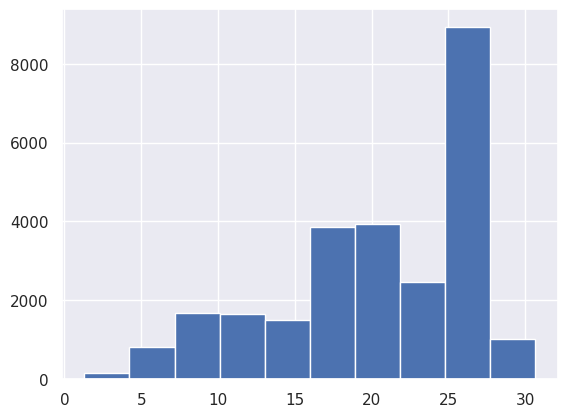

In [ ]:
sns.set()
plt.hist(df['avg_temp'])

In [ ]:
def hist_box():
    for i in df.columns[3:]:
        plt.subplots(nrows=1,ncols=2,figsize=(15,6))
        plt.subplot(1,2,1)
        plt.hist(df[i])
        plt.title(i);
        plt.subplot(1,2,2)
        sns.boxplot(data=df[i])
        plt.title(i);
        yield()

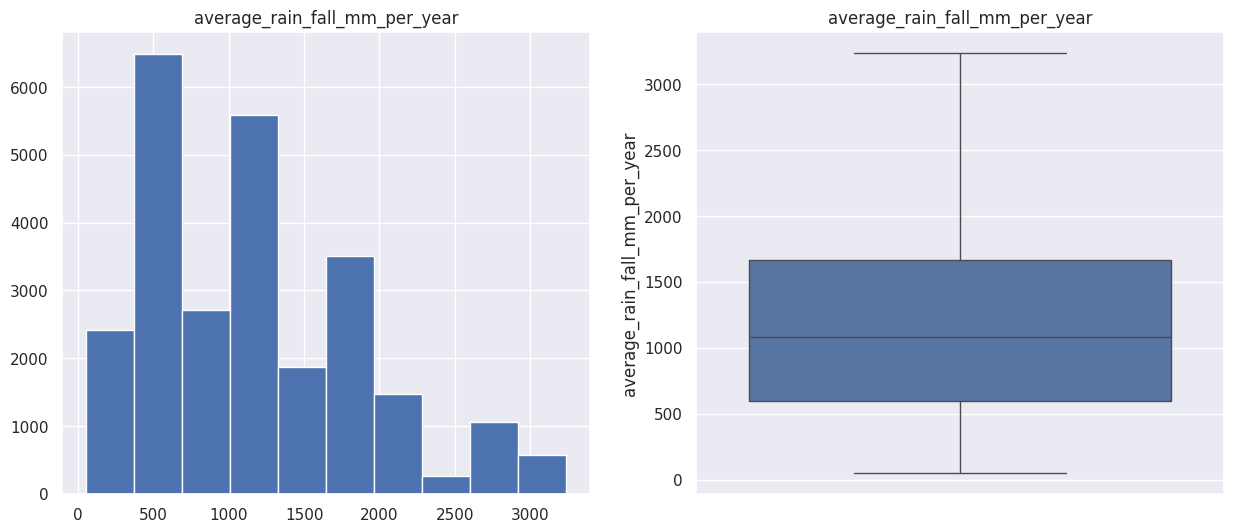

In [ ]:
hibox = hist_box()
next(hibox);

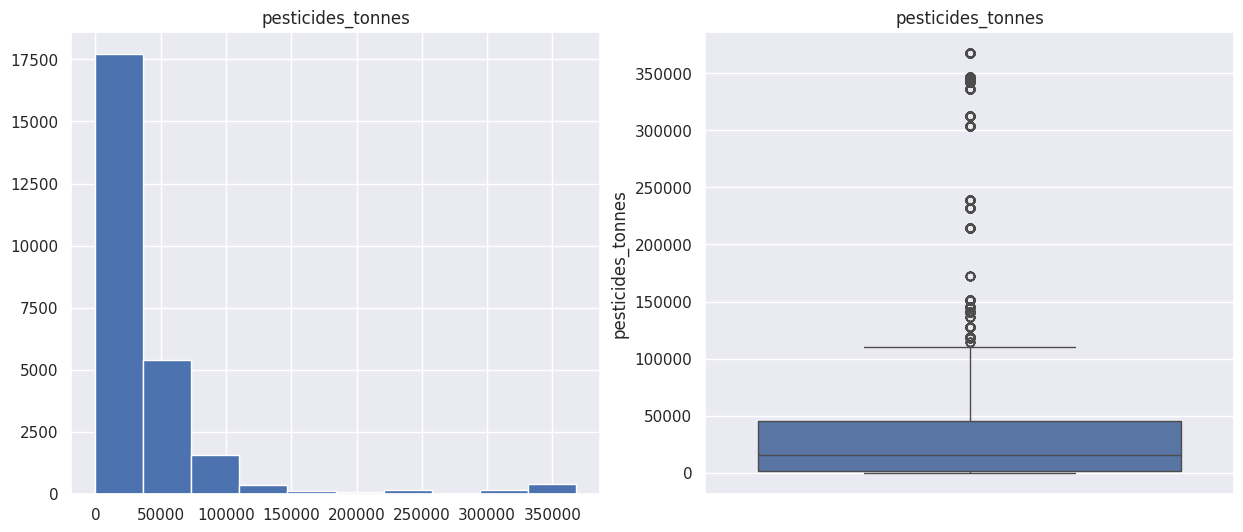

In [ ]:
next(hibox);

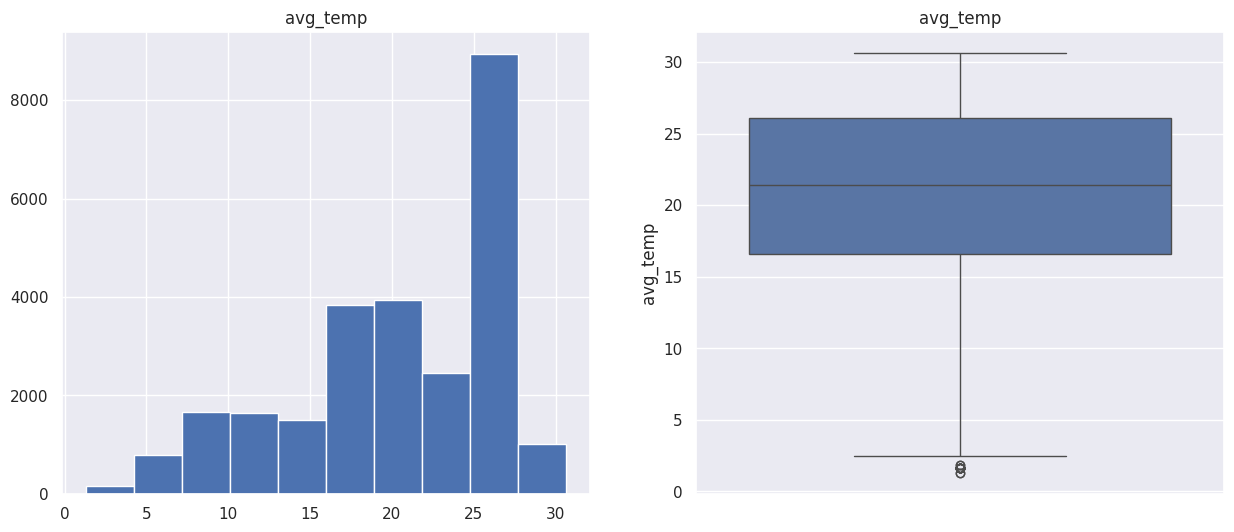

In [ ]:
next(hibox);

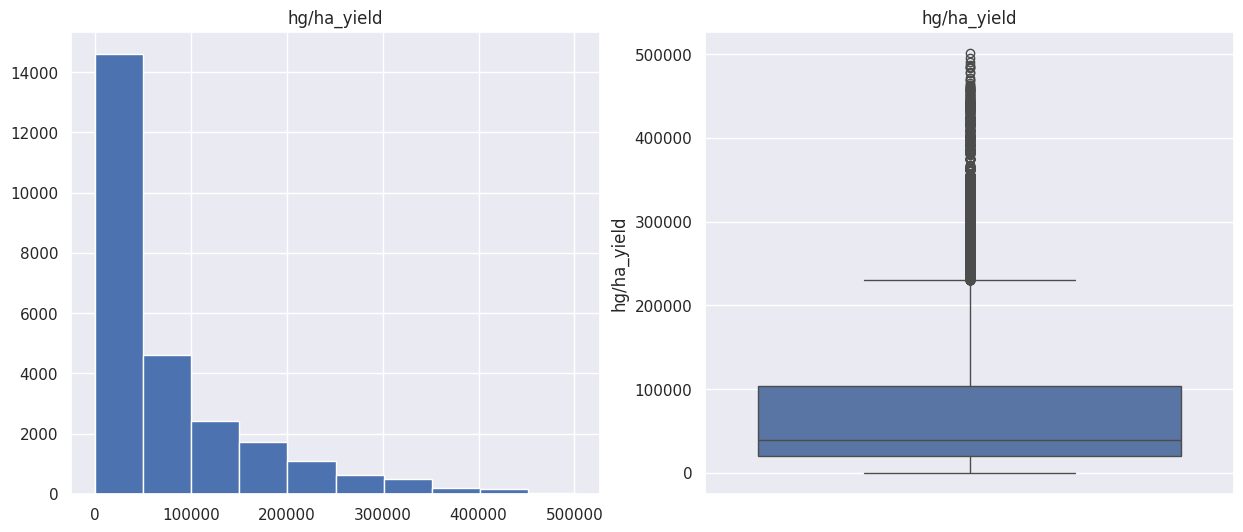

In [ ]:
next(hibox);

In [ ]:
q_hi  = df["hg/ha_yield"].quantile(0.90)
#clear outliers
df = df[(df["hg/ha_yield"] < q_hi)]

In [ ]:
df

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
0,Albania,Maize,1990,1485,121.00,16.37,36613
1,Albania,Potatoes,1990,1485,121.00,16.37,66667
2,Albania,"Rice, paddy",1990,1485,121.00,16.37,23333
3,Albania,Sorghum,1990,1485,121.00,16.37,12500
4,Albania,Soybeans,1990,1485,121.00,16.37,7000
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,657,2550.07,19.76,22581
28238,Zimbabwe,Sorghum,2013,657,2550.07,19.76,3066
28239,Zimbabwe,Soybeans,2013,657,2550.07,19.76,13142
28240,Zimbabwe,Sweet potatoes,2013,657,2550.07,19.76,22222


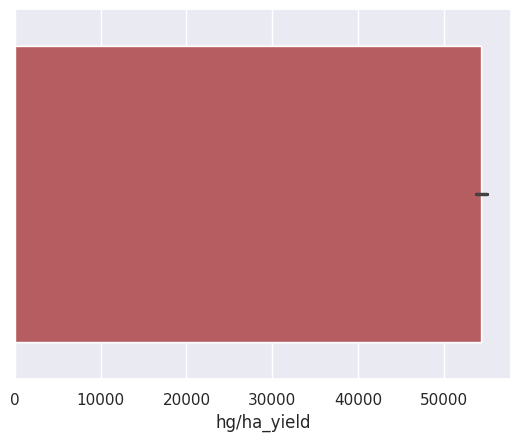

In [ ]:
sns.set()
#check outliers
for i in df.columns[3:]:
    sns.barplot(data = df , x = df["hg/ha_yield"]); # Changed sns.bar to sns.barplot

**Histrogram**

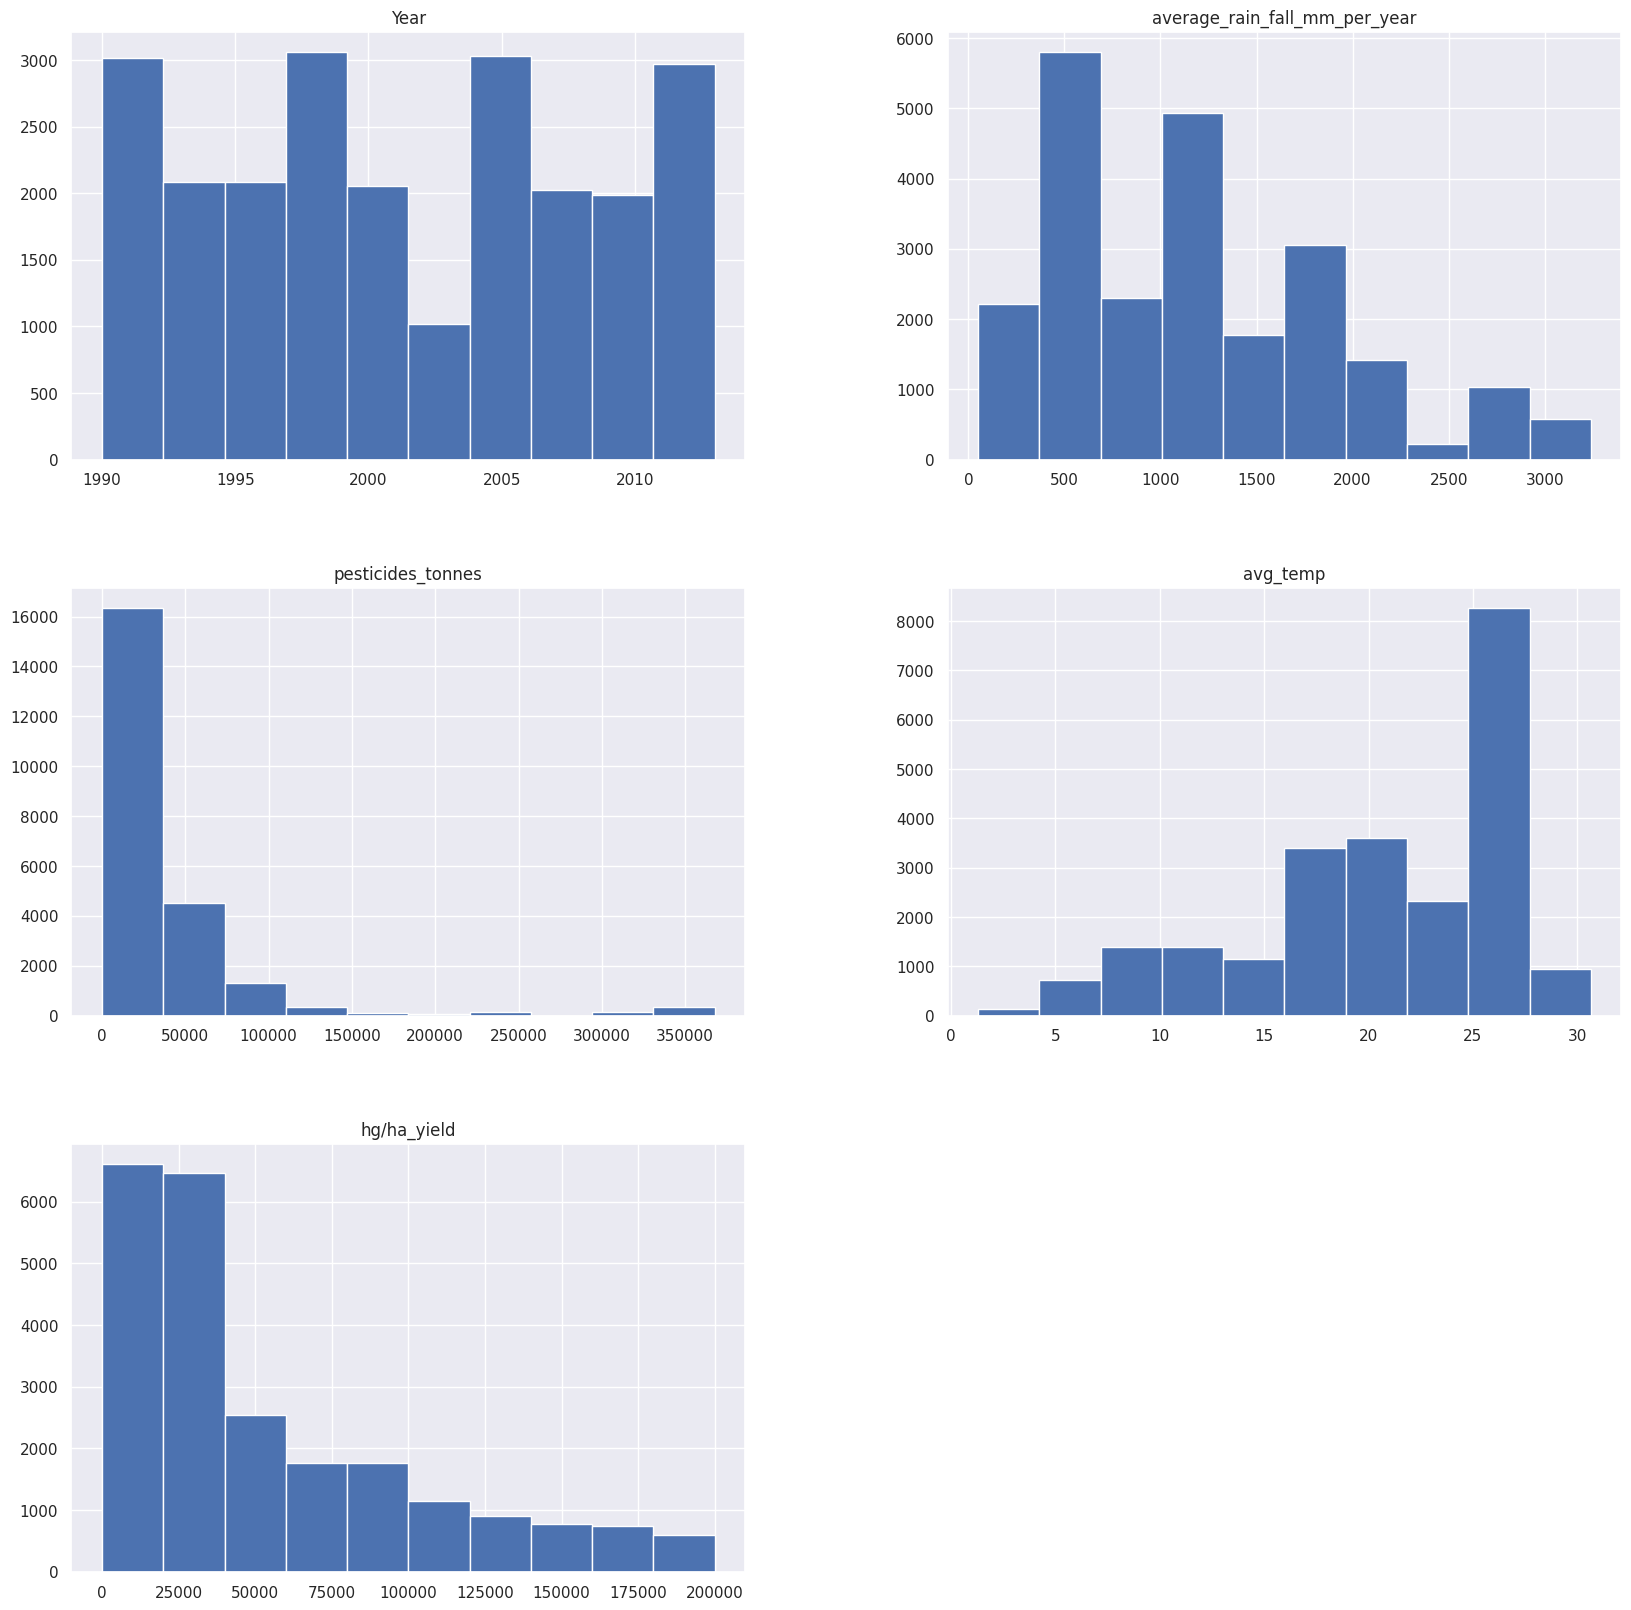

In [ ]:
sns.set()
df.hist(figsize=(20,20));

**Bar plot**

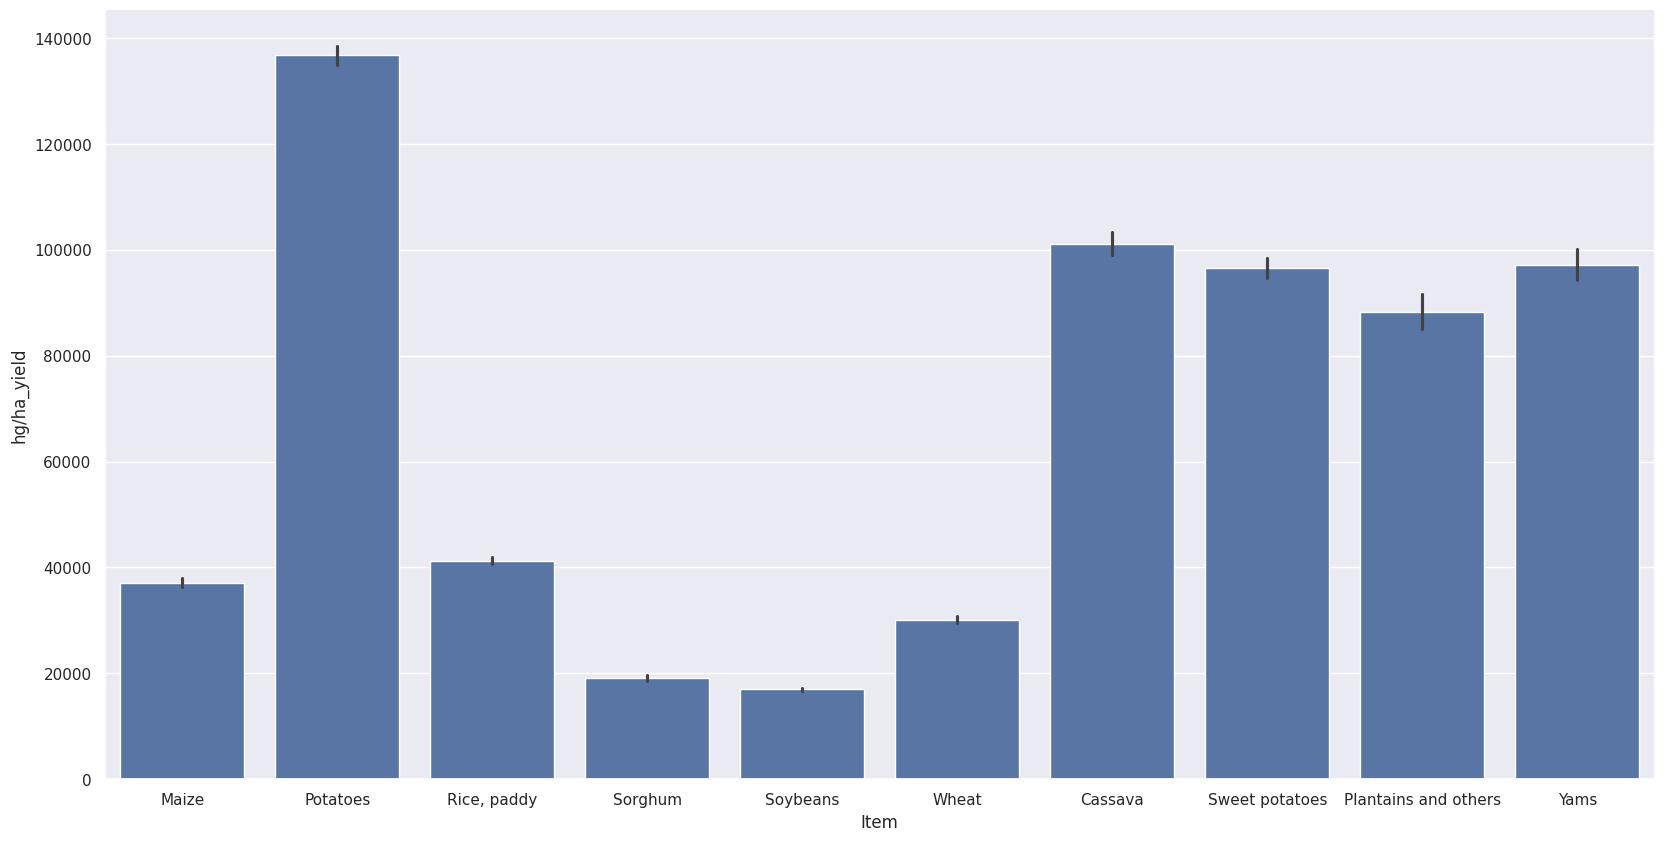

In [ ]:
#visualization of Items with hg/ha_yield
sns.set()
plt.figure(figsize=(20,10))
sns.barplot(data=df, x = df.Item, y = df['hg/ha_yield'])
plt.show()

In [ ]:
ST_df=df.groupby(df.Area)[['hg/ha_yield']].sum()
ST_df

,hg/ha_yield
Area,
Albania,4507786
Algeria,4206925
Angola,5722563
Argentina,21207388
Armenia,4101659
...,...
Ukraine,5496901
United Kingdom,6971876
Uruguay,8894580


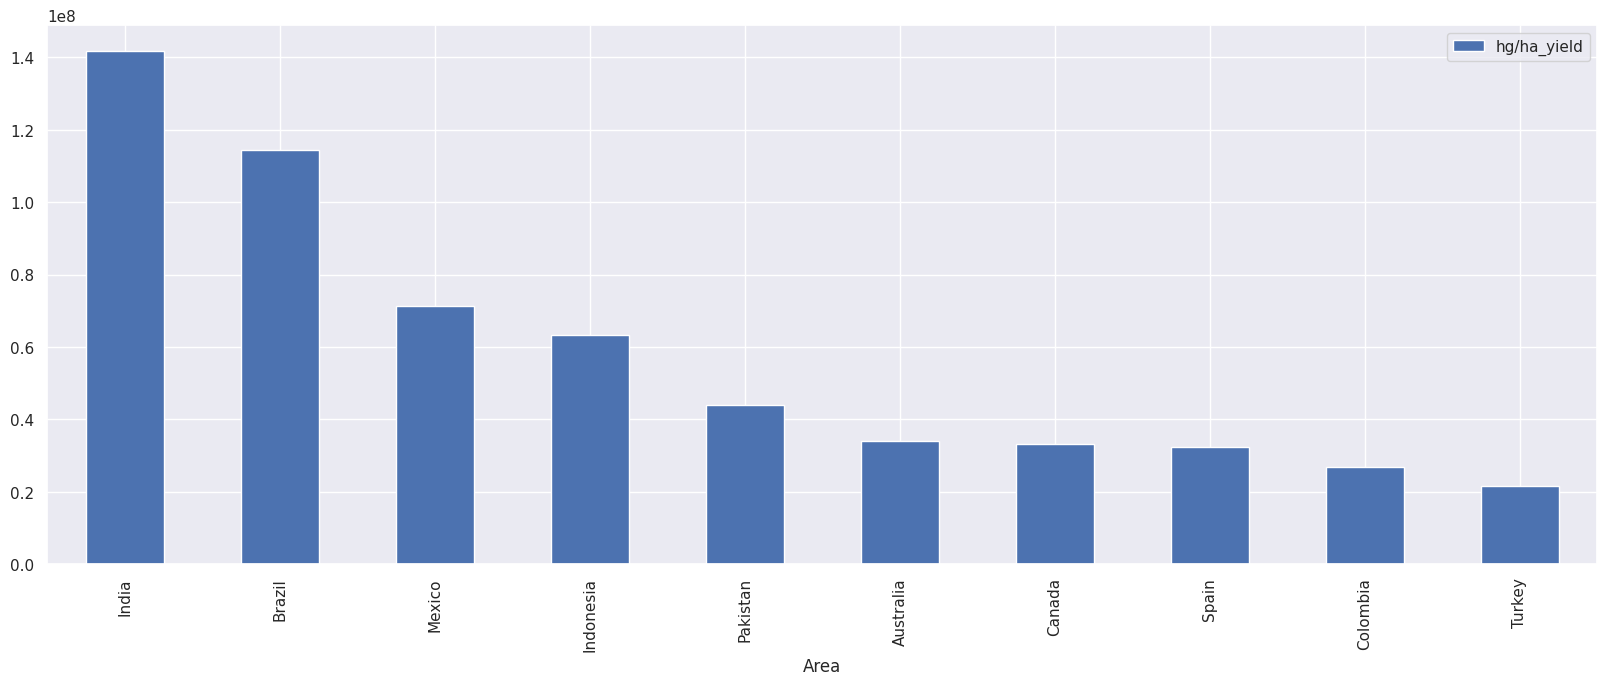

In [ ]:
#Area with the sum of Hg/Ha_yield
d10 = ST_df.nlargest(10, 'hg/ha_yield')
T10 = d10.loc[:,['hg/ha_yield']].head(10)
#Visualize bar plot
sns.set()
T10.plot.bar(figsize=(20,7));

Remove the ScatterPlot Diagrams

**scatter plot**

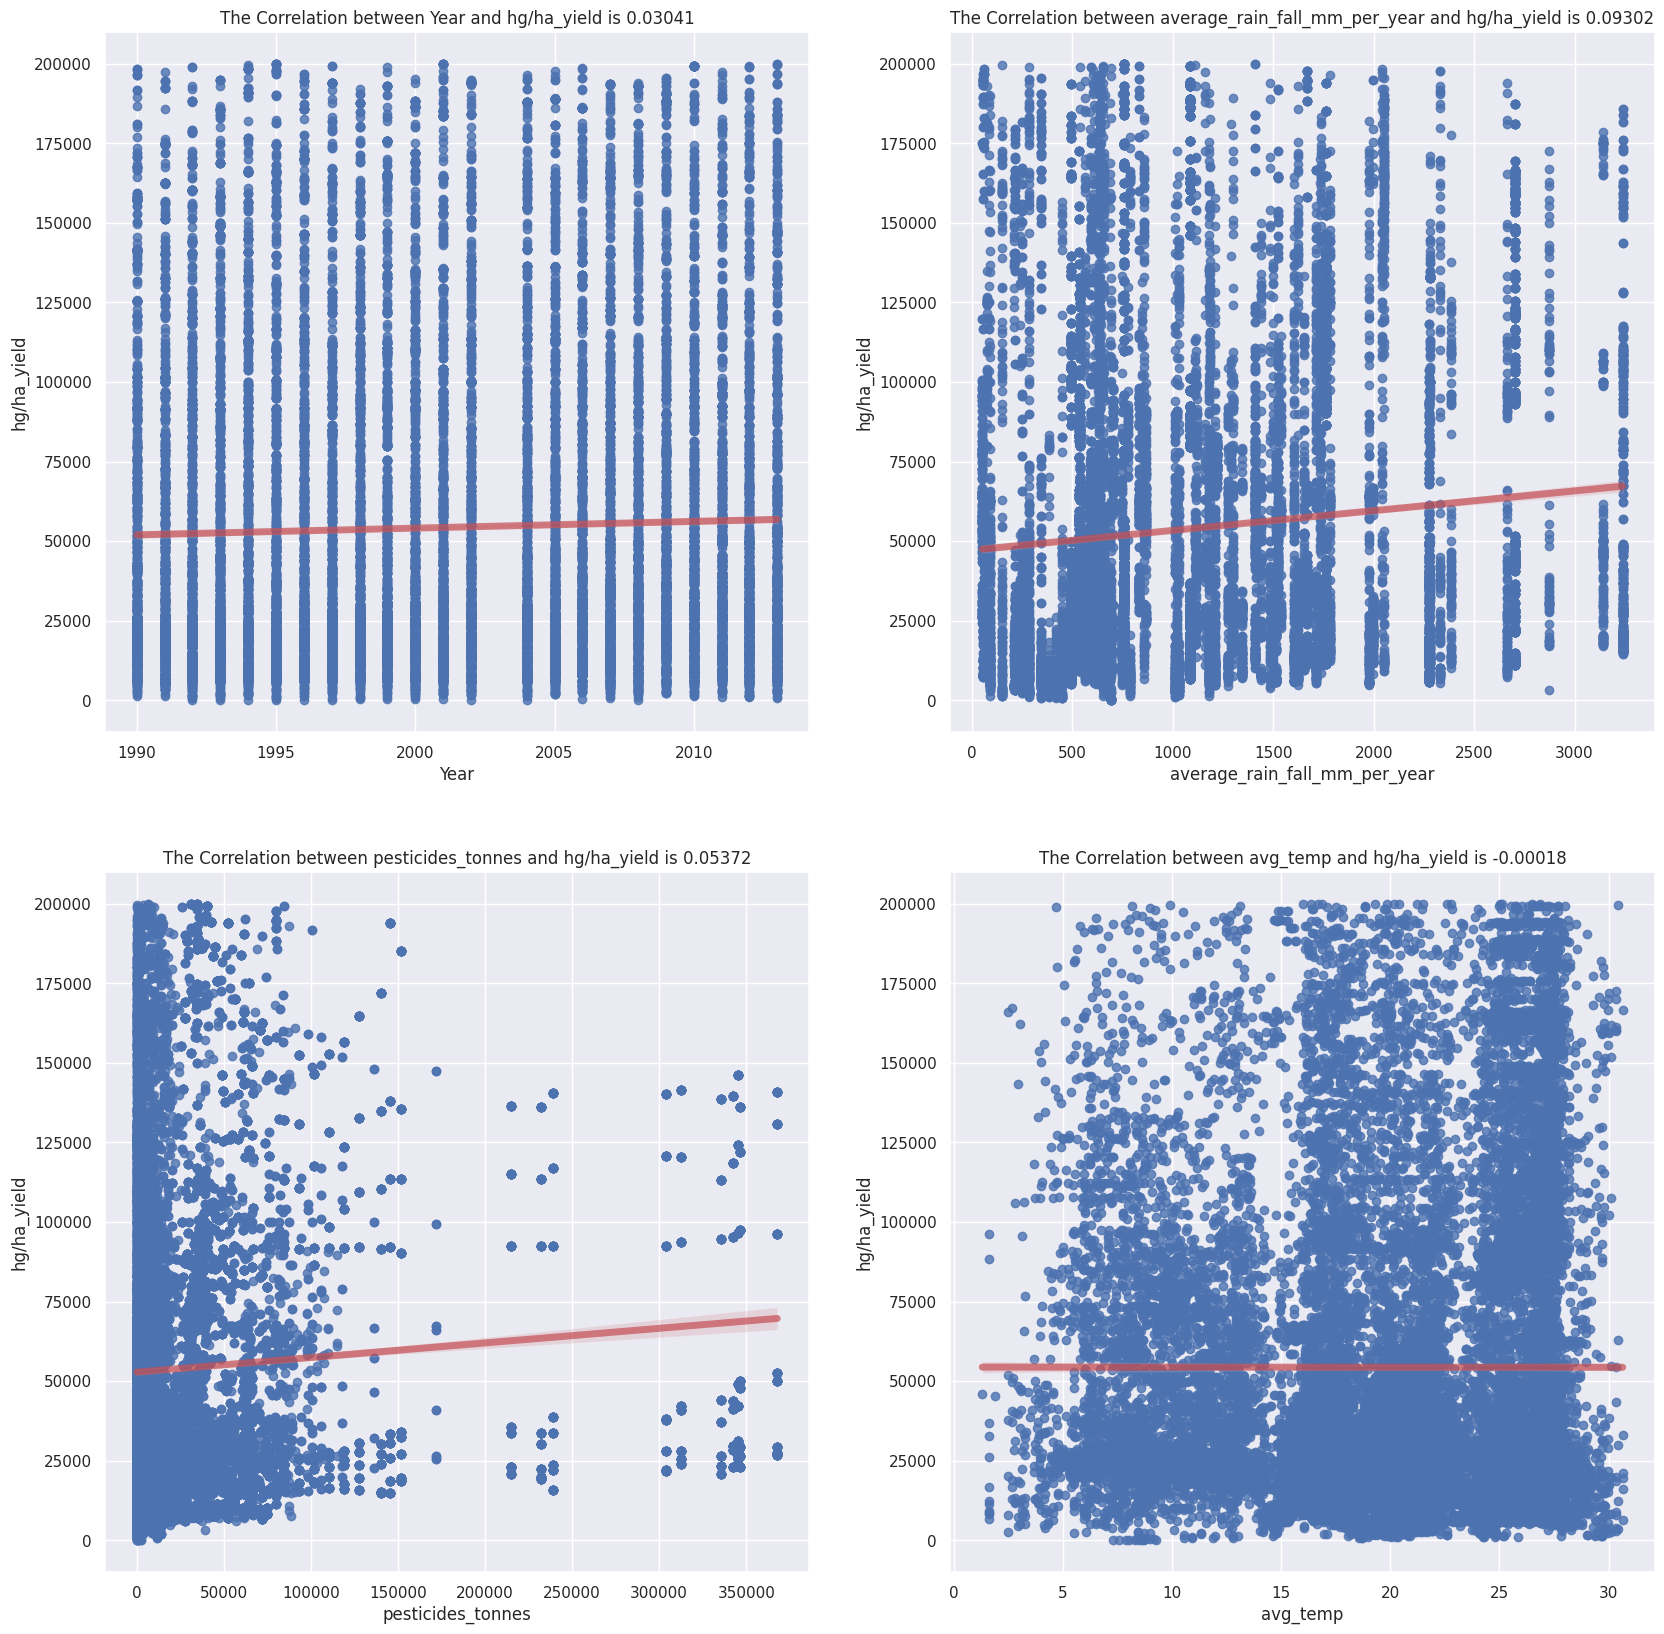

In [ ]:
#make subplot for 4 plots
fig,plotcanvas=plt.subplots(nrows=2,ncols=2,figsize=(20,20))
#Store the numerical columns name in a variable
continuouscols = df.columns[2:].tolist()
#make for loop to iterate over all columns
for i in range(0,len(continuouscols)-1):
    x = 0 if ((i == 0) or (i == 1)) else  1
    y = 0 if ((i == 0) or (i == 2)) else  1
    #make scatterplot with regression line
    sns.regplot(data = df, x = continuouscols[i], y = 'hg/ha_yield', line_kws={"color":"r","alpha":0.7,"lw":5}, ax=plotcanvas[x,y])
    #find correlation between this two columns
    cor = round(df['hg/ha_yield'].corr(df[continuouscols[i]]),5)
    #put title for this plot
    plotcanvas[x , y].set_title(f'The Correlation between {continuouscols[i]} and hg/ha_yield is {cor}')

**Heat Map**

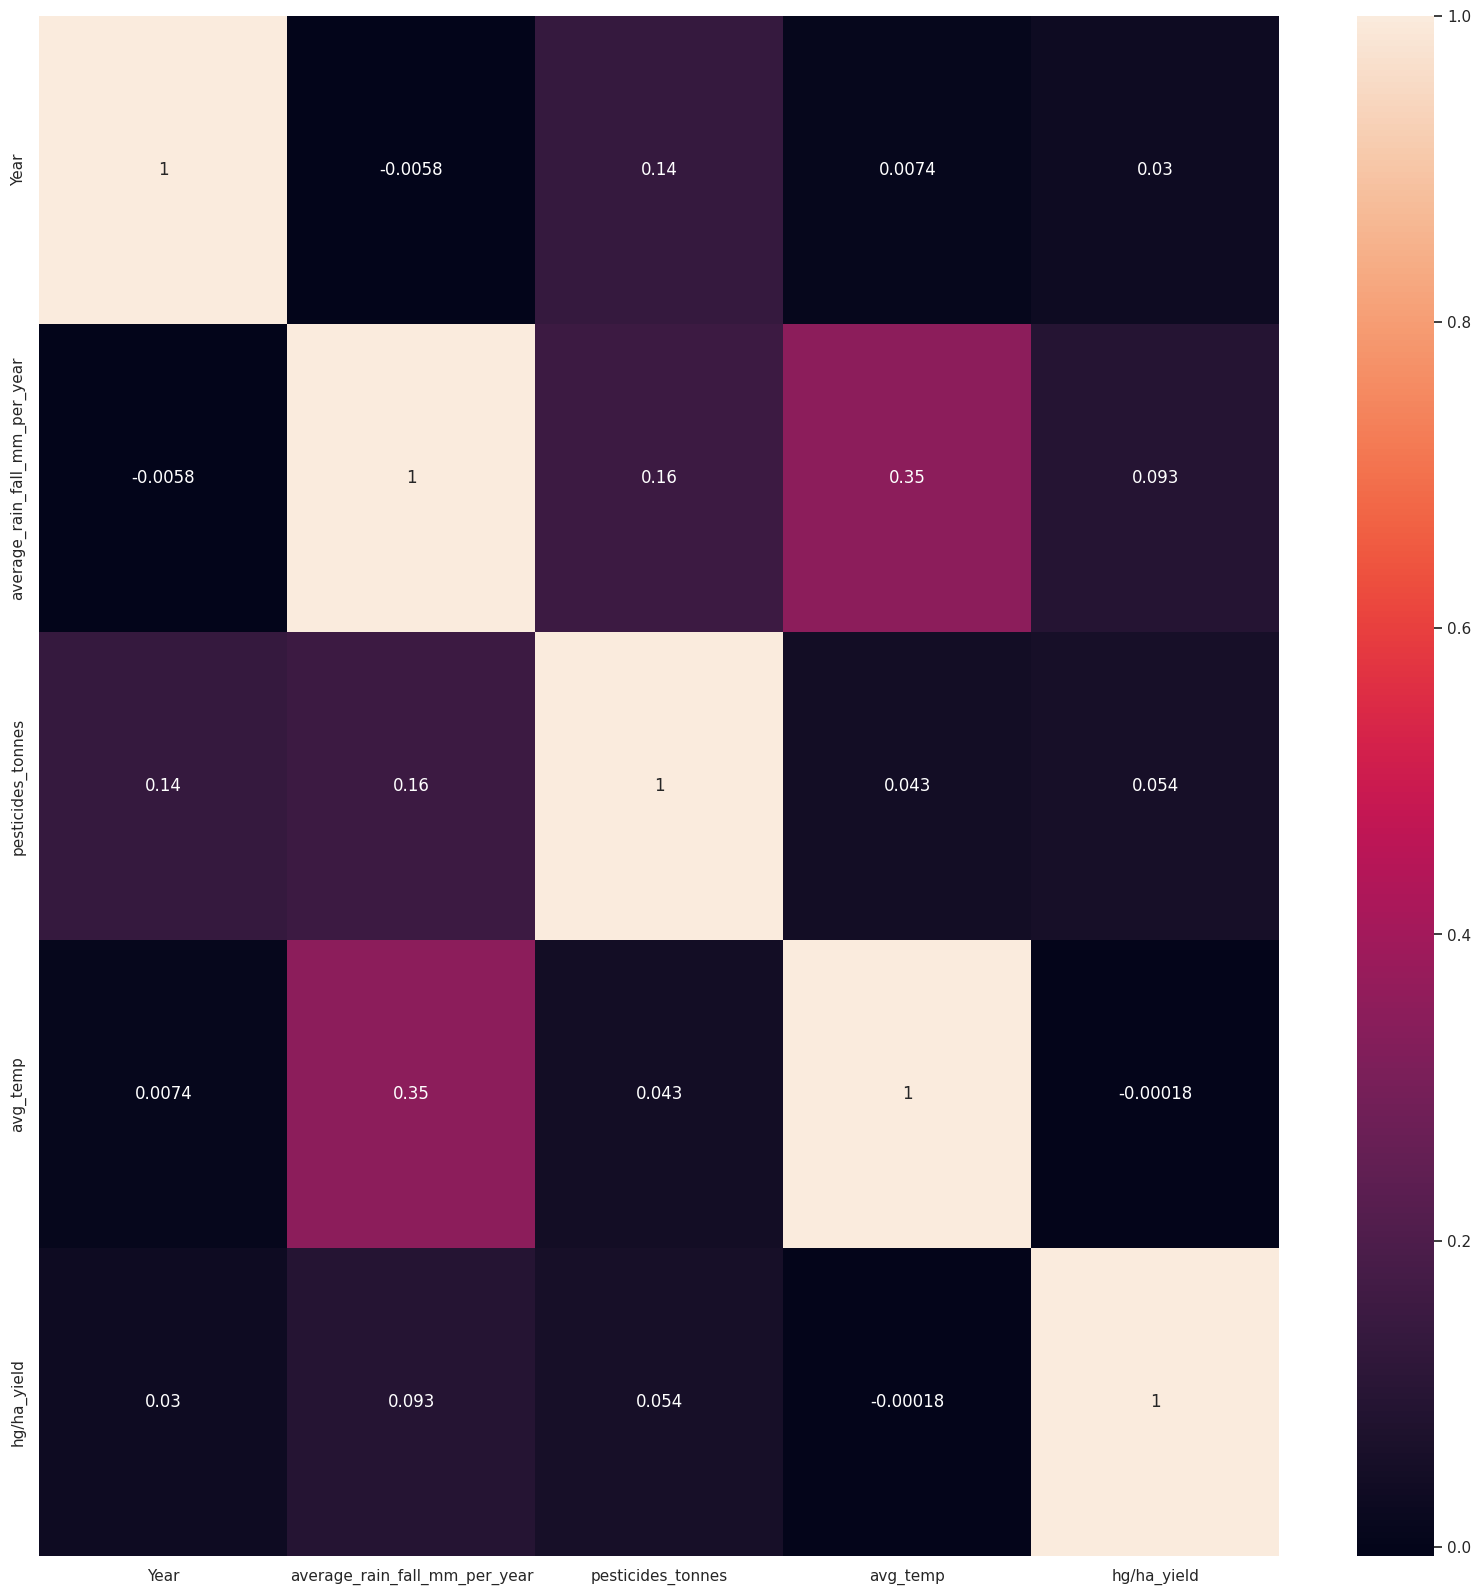

In [ ]:
#making heatmap for all data
plt.figure(figsize=(20,20))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True)
plt.show()

In [ ]:
df.describe()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
count,23337.000000,23337.000000,23337.000000,23337.000000,23337.000000
mean,2001.366800,1161.868878,33689.860068,20.646170,54378.879162
std,7.035588,732.702071,57254.518533,6.389319,48859.772498
min,1990.000000,51.000000,0.040000,1.300000,50.000000
25%,1995.000000,593.000000,1578.000000,16.920000,18448.000000
50%,2001.000000,1083.000000,13697.000000,21.700000,32924.000000
75%,2008.000000,1668.000000,43720.040000,26.140000,81319.000000
max,2013.000000,3240.000000,367778.000000,30.650000,199939.000000


**One Hot Encoding**

In [ ]:
#one hot encoding for the categorical columns to can be trained in the model
df = pd.get_dummies(df,columns=['Area','Item'])
df.rename(columns={x:x[5:] for x in df.columns[6:]}, inplace = True)
df.head(10)

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield,Area_Albania,Algeria,Angola,Argentina,Armenia,...,Cassava,Maize,Plantains and others,Potatoes,"Rice, paddy",Sorghum,Soybeans,Sweet potatoes,Wheat,Yams
0,1990,1485,121.0,16.37,36613,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,1990,1485,121.0,16.37,66667,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,1990,1485,121.0,16.37,23333,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,1990,1485,121.0,16.37,12500,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,1990,1485,121.0,16.37,7000,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
5,1990,1485,121.0,16.37,30197,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
6,1991,1485,121.0,15.36,29068,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
7,1991,1485,121.0,15.36,77818,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
8,1991,1485,121.0,15.36,28538,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
9,1991,1485,121.0,15.36,6667,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
#split the data from the target data
x = df.drop(labels=['hg/ha_yield'], axis=1)
y = df['hg/ha_yield']

In [ ]:
y.describe()

,hg/ha_yield
count,23337.000000
mean,54378.879162
std,48859.772498
min,50.000000
25%,18448.000000
50%,32924.000000
75%,81319.000000
max,199939.000000


**Dimension reduction**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x = scaler.fit_transform(x)

**Splitting data**

In [ ]:
#split data to x_train, x_test, y_train, y_test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=40,shuffle=True)

In [ ]:
#clear memory
del df
del x
del y

In [ ]:
#Shape of the data
print('Shape of the x_train data : ', x_train.shape)
print('Shape of the y_train data : ', y_train.shape)
print('Shape of the x_test data : ', x_test.shape)
print('Shape of the y_test data : ', y_test.shape)

Shape of the x_train data :  (16335, 115)
Shape of the y_train data :  (16335,)
Shape of the x_test data :  (7002, 115)
Shape of the y_test data :  (7002,)


In [ ]:
#Make DataFrame for track model accuracy
df_models = pd.DataFrame(columns=["Model", "MAE","MEDAE","MSE","RMSE", "Max Error","R2 Score","EVS","MAPE"])

**Evaluation Function**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, median_absolute_error, r2_score, explained_variance_score, mean_absolute_percentage_error
import numpy as np
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
#Evaluation function for regression models
def regression_report(y_true, y_pred):

    error = y_true - y_pred

    #Evaluation matrics
    mae = mean_absolute_error(y_true, y_pred)
    medae = median_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    maxerr = max_error(y_true, y_pred)
    r_squared = r2_score(y_true, y_pred)
    evs = explained_variance_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    metrics = [
        ('Mean Absolute Error', mae),
        ('Median Absolute Error', medae),
        ('Mean Squared Error', mse),
        ('Root Mean Squared Error', rmse),
        ('Max error', maxerr) ,
        ('R2 score', r_squared),
        ('Explained variance score', evs),
        ('Mean Absolute Percentage Error', mape)
    ]

    print('Regression Report:')
    for metric_name, metric_value in metrics:
        print(f'\t\t\t{metric_name:30s}: {metric_value: >20.3f}')

    return mae, medae, mse, rmse, maxerr, r_squared, evs, mape

**Regression Models**

**Linear Regression**

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Define parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': ['constant', "optimal", "invscaling", "adaptive"],
    'max_iter': [10000, 20000],  # Increase max_iter if needed
    'tol': [1e-4, 1e-3]  # Adjust tolerance
}

# Create the SGDRegressor model
sgd = SGDRegressor()

# Setup GridSearchCV with 5-fold cross-validation
model = GridSearchCV(estimator=sgd, param_grid=param_grid, cv=5, verbose=0)

# Fit the model
model.fit(x_train, y_train)

# Make predictions using the best model
sgd_pred = model.predict(x_test)

# Assuming regression_report() is a custom function to evaluate metrics
mae, medae, mse, rmse, maxerr, r_squared, evs, mape = regression_report(y_test, sgd_pred)

# Create a row to store the results
row = {
    "Model": "SGDRegressor",
    "MAE": mae,
    "MEDAE": medae,
    "MSE": mse,
    "RMSE": rmse,
    "Max Error": maxerr,
    "R2 Score": r_squared,
    "EVS": evs,
    "MAPE": mape
}

# Concatenate the new result with the existing results DataFrame
df_models = pd.concat([df_models, pd.DataFrame([row])], ignore_index=True)


Regression Report:
			Mean Absolute Error           :            16436.641
			Median Absolute Error         :            11422.216
			Mean Squared Error            :        519468260.910
			Root Mean Squared Error       :            22791.846
			Max error                     :           130282.340
			R2 score                      :                0.782
			Explained variance score      :                0.782
			Mean Absolute Percentage Error:                0.646


<ipython-input-39-b8c4a9a94f87>:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_models = pd.concat([df_models, pd.DataFrame([row])], ignore_index=True)


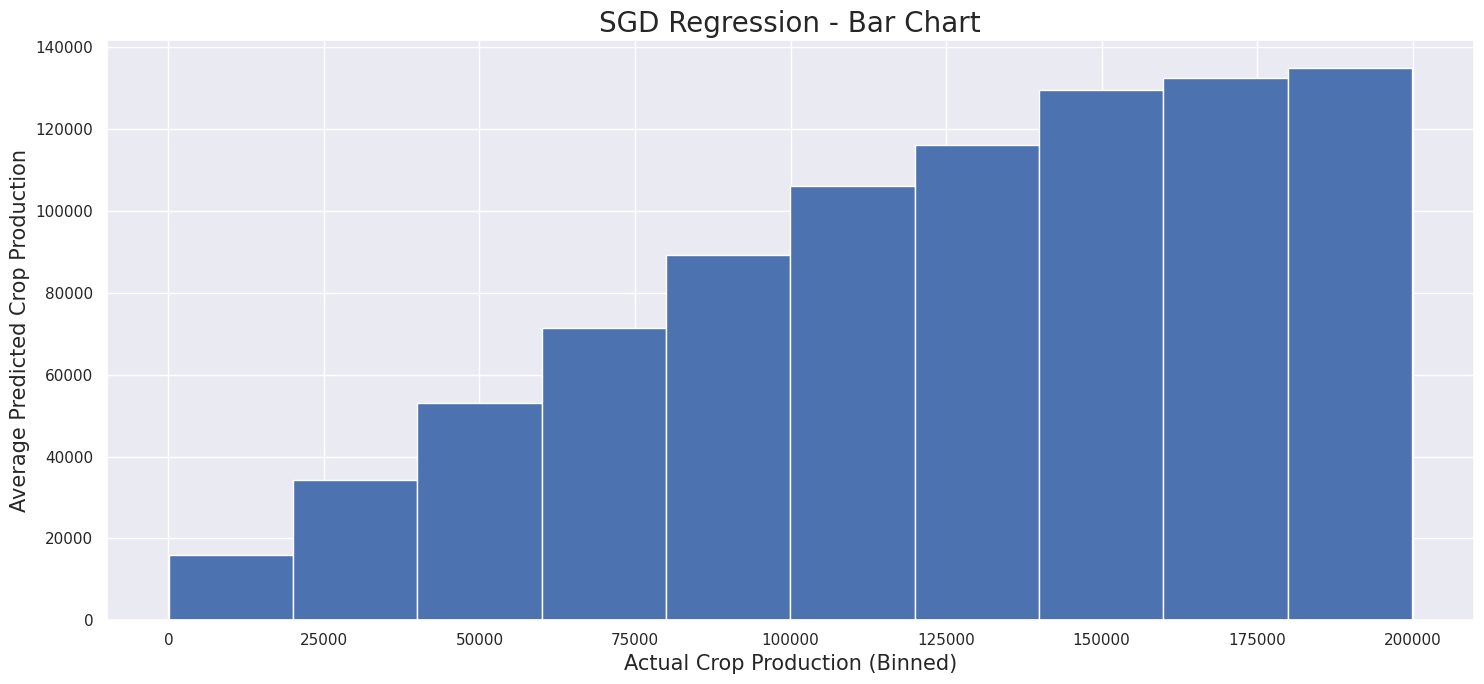

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test and sgd_pred are your actual and predicted values
plt.figure(figsize=(15,7))

# Define the number of bins for grouping actual values
num_bins = 10

# Create bins using np.linspace
bins = np.linspace(min(y_test), max(y_test), num_bins + 1)

# Group actual values into bins and calculate average predicted value for each bin
binned_data = [[] for _ in range(num_bins)]
for actual, predicted in zip(y_test, sgd_pred):
    bin_index = np.digitize(actual, bins) - 1
    if 0 <= bin_index < num_bins:
        binned_data[bin_index].append(predicted)

avg_predicted = [np.mean(data) if data else 0 for data in binned_data]

# Plot the bar chart
plt.bar(bins[:-1], avg_predicted, width=(bins[1] - bins[0]), align='edge')

plt.title('SGD Regression - Bar Chart', fontsize=20)
plt.xlabel('Actual Crop Production (Binned)', fontsize=15)
plt.ylabel('Average Predicted Crop Production', fontsize=15)

plt.tight_layout()
plt.show()


SGD Regressor Model got a great prediction r2 score equals 0.782 which is not good
Mean Absolute Error is 16436.641 that means that the different between actual mean and predicted mean is 16440
RMSE is  22791.880 which is bad

**Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso
model = Lasso(alpha= 2, max_iter=10000, tol=0.001)
model.fit(x_train, y_train)
lass_pred = model.predict(x_test)
mae, medae, mse, rmse, maxerr, r_squared, evs, mape = regression_report(y_test, lass_pred)
row = {"Model": "LassoRegression", "MAE": mae,"MEDAE": medae, "MSE": mse, "RMSE": rmse,
           "Max Error": maxerr, "R2 Score": r_squared, "EVS": evs, "MAPE": mape}

df_models = pd.concat([df_models, pd.DataFrame([row])], ignore_index=True)

Regression Report:
			Mean Absolute Error           :            16434.485
			Median Absolute Error         :            11422.569
			Mean Squared Error            :        519474453.950
			Root Mean Squared Error       :            22791.982
			Max error                     :           130324.564
			R2 score                      :                0.782
			Explained variance score      :                0.782
			Mean Absolute Percentage Error:                0.646


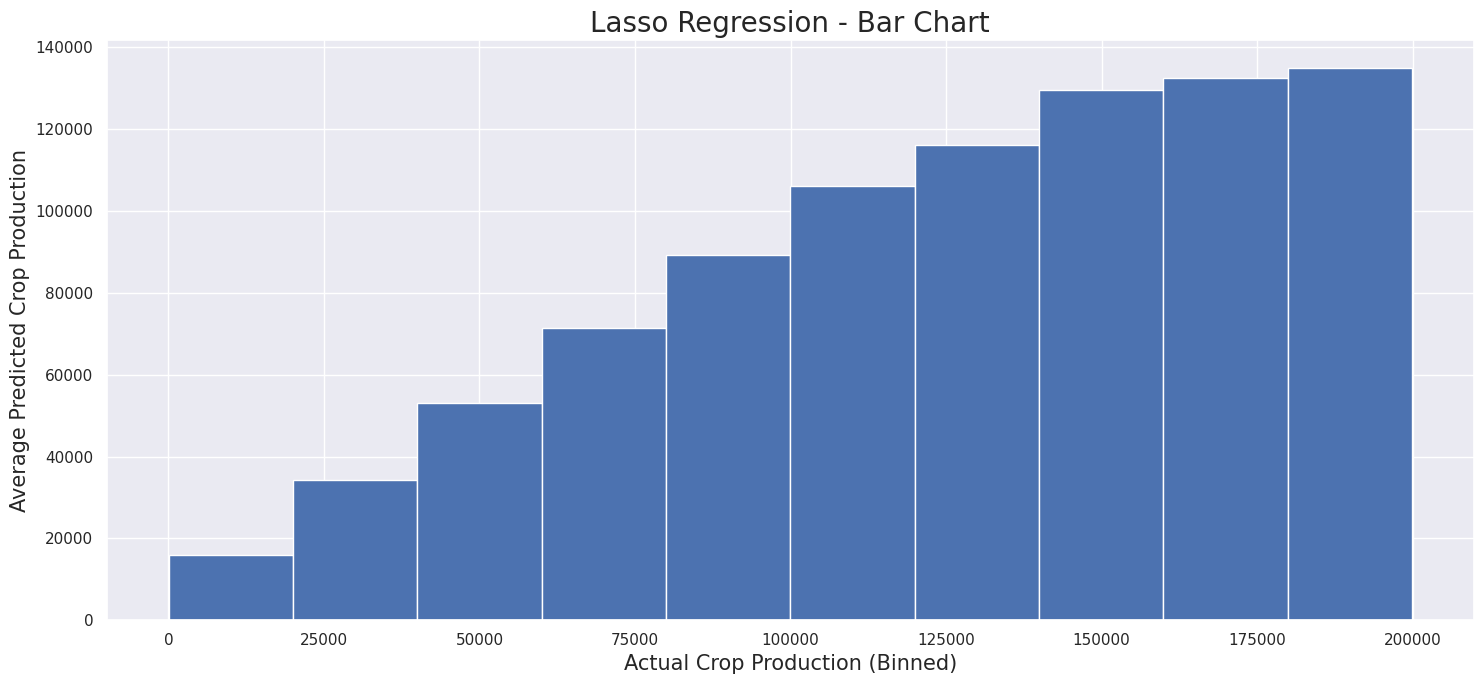

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15,7))

# Define the number of bins for grouping actual values
num_bins = 10

# Create bins using np.linspace
bins = np.linspace(min(y_test), max(y_test), num_bins + 1)

# Group actual values into bins and calculate average predicted value for each bin
binned_data = [[] for _ in range(num_bins)]
for actual, predicted in zip(y_test, lass_pred):
    bin_index = np.digitize(actual, bins) - 1
    if 0 <= bin_index < num_bins:
        binned_data[bin_index].append(predicted)

avg_predicted = [np.mean(data) if data else 0 for data in binned_data]

# Plot the bar chart
plt.bar(bins[:-1], avg_predicted, width=(bins[1] - bins[0]), align='edge')

plt.title('Lasso Regression - Bar Chart', fontsize=20)
plt.xlabel('Actual Crop Production (Binned)', fontsize=15)
plt.ylabel('Average Predicted Crop Production', fontsize=15)

plt.tight_layout()
plt.show()

Lasso Regression Model got a great prediction r2 score equals 0.782 which is not good
Mean Absolute Error is 16434 that means that the different between actual mean and predicted mean is 30142
RMSE is 43226 which is bad


**Support Vector Machine(SVM)**

In [ ]:
!pip install scipy
from sklearn.svm import SVR
import scipy.stats as sp  # Importing scipy.stats as sp

param_dist = {
    'kernel': ['rbf'],
    'C': sp.randint(1, 10001),  # Changed to sp.randint
    "epsilon": sp.uniform(0.00001, 0.99),  # Changed to sp.uniform
    'gamma': ['scale', 'auto']
}

svr = SVR()
svrcv = RandomizedSearchCV(
    estimator=svr,
    param_distributions=param_dist,
    cv=3,
    verbose=0
)
svrcv.fit(x_train, y_train)
svr_pred = svrcv.predict(x_test)
mae, medae, mse, rmse, maxerr, r_squared, evs, mape = regression_report(y_test, svr_pred)
row = {"Model": "SupportVectorRegressor", "MAE": mae, "MEDAE": medae, "MSE": mse, "RMSE": rmse,
       "Max Error": maxerr, "R2 Score": r_squared, "EVS": evs, "MAPE": mape}
df_models = pd.concat([df_models, pd.DataFrame([row])], ignore_index=True)  # Changed append to concat
print("The best parameters are %s with a score of %0.2f"
      % (svrcv.best_params_, svrcv.best_score_))

Regression Report:
			Mean Absolute Error           :             8636.815
			Median Absolute Error         :             2660.861
			Mean Squared Error            :        349900464.963
			Root Mean Squared Error       :            18705.627
			Max error                     :           144408.306
			R2 score                      :                0.853
			Explained variance score      :                0.858
			Mean Absolute Percentage Error:                0.223
The best parameters are {'C': 9977, 'epsilon': 0.8875607978834648, 'gamma': 'auto', 'kernel': 'rbf'} with a score of 0.82


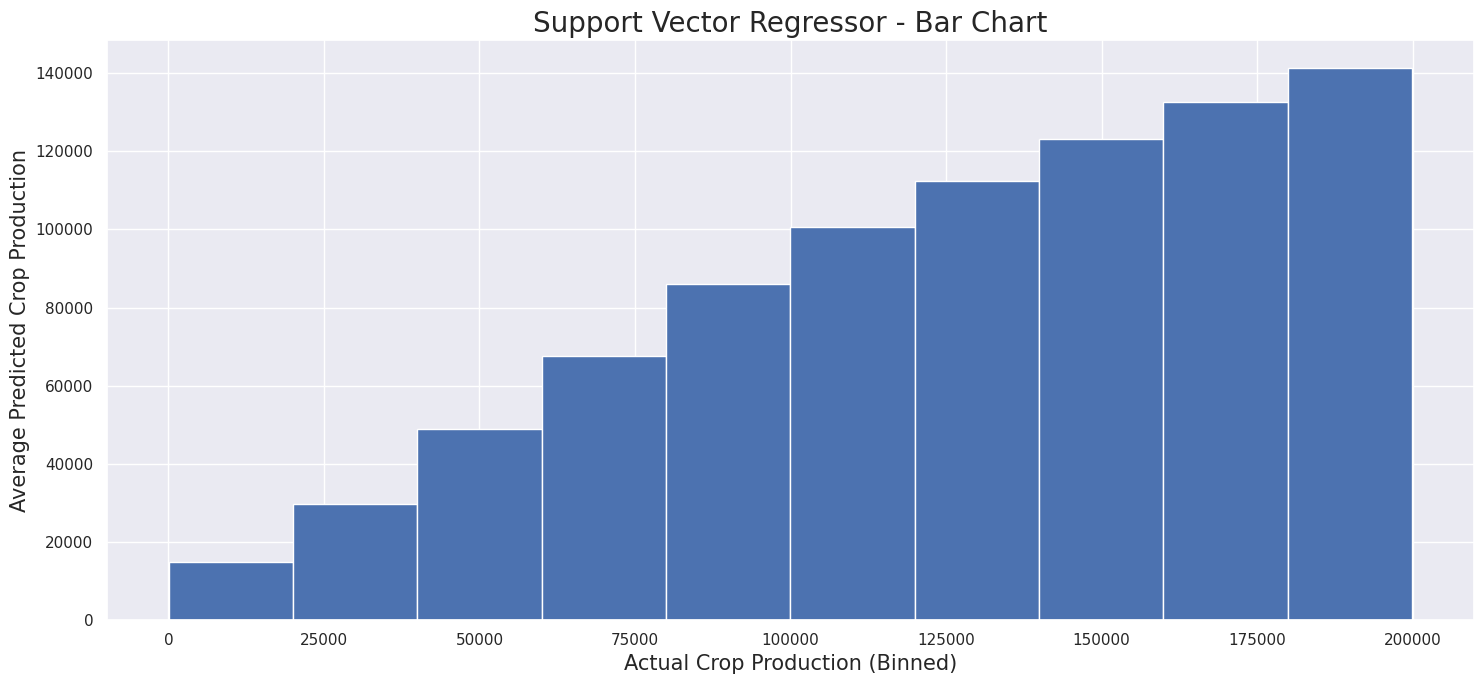

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15,7))

# Define the number of bins for grouping actual values
num_bins = 10

# Create bins using np.linspace
bins = np.linspace(min(y_test), max(y_test), num_bins + 1)

# Group actual values into bins and calculate average predicted value for each bin
binned_data = [[] for _ in range(num_bins)]
for actual, predicted in zip(y_test, svr_pred):
    bin_index = np.digitize(actual, bins) - 1
    if 0 <= bin_index < num_bins:
        binned_data[bin_index].append(predicted)

avg_predicted = [np.mean(data) if data else 0 for data in binned_data]

# Plot the bar chart
plt.bar(bins[:-1], avg_predicted, width=(bins[1] - bins[0]), align='edge')

plt.title('Support Vector Regressor - Bar Chart', fontsize=20)
plt.xlabel('Actual Crop Production (Binned)', fontsize=15)
plt.ylabel('Average Predicted Crop Production', fontsize=15)

plt.tight_layout()
plt.show()

Support Vector Regressor Model got a great prediction r2 score equals 0.854 which is not good
Mean Absolute Error is  8636.815 that means that the different between actual mean and predicted mean is 16370
RMSE is  18705.627 which is bad


**Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Create the random grid
random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(5, 30, num = 6)],
               'min_samples_split': [2, 5, 10, 15, 100],
               'min_samples_leaf': [1, 2, 5, 10],
               'bootstrap' : [True, False]
              }
rfr = RandomForestRegressor()
rfrcv = RandomizedSearchCV(
                              estimator=rfr,
                              param_distributions=random_grid,
                              cv=3,
                              verbose=0
                            )
rfrcv.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
18 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]})

In [ ]:
print("The best parameters are %s with a score of %0.2f"
      % (rfrcv.best_params_, rfrcv.best_score_))
rfr_pred = rfrcv.predict(x_test)
mae, medae, mse, rmse, maxerr, r_squared, evs, mape = regression_report(y_test, rfr_pred)
row = {"Model": "RandomForestRegressor", "MAE": mae,"MEDAE": medae, "MSE": mse, "RMSE": rmse,
           "Max Error": maxerr, "R2 Score": r_squared, "EVS": evs, "MAPE": mape}
df_models = pd.concat([df_models, pd.DataFrame([row])], ignore_index=True)

The best parameters are {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False} with a score of 0.92
Regression Report:
			Mean Absolute Error           :             9116.086
			Median Absolute Error         :             6275.802
			Mean Squared Error            :        175334581.867
			Root Mean Squared Error       :            13241.397
			Max error                     :           121696.197
			R2 score                      :                0.926
			Explained variance score      :                0.926
			Mean Absolute Percentage Error:                0.422


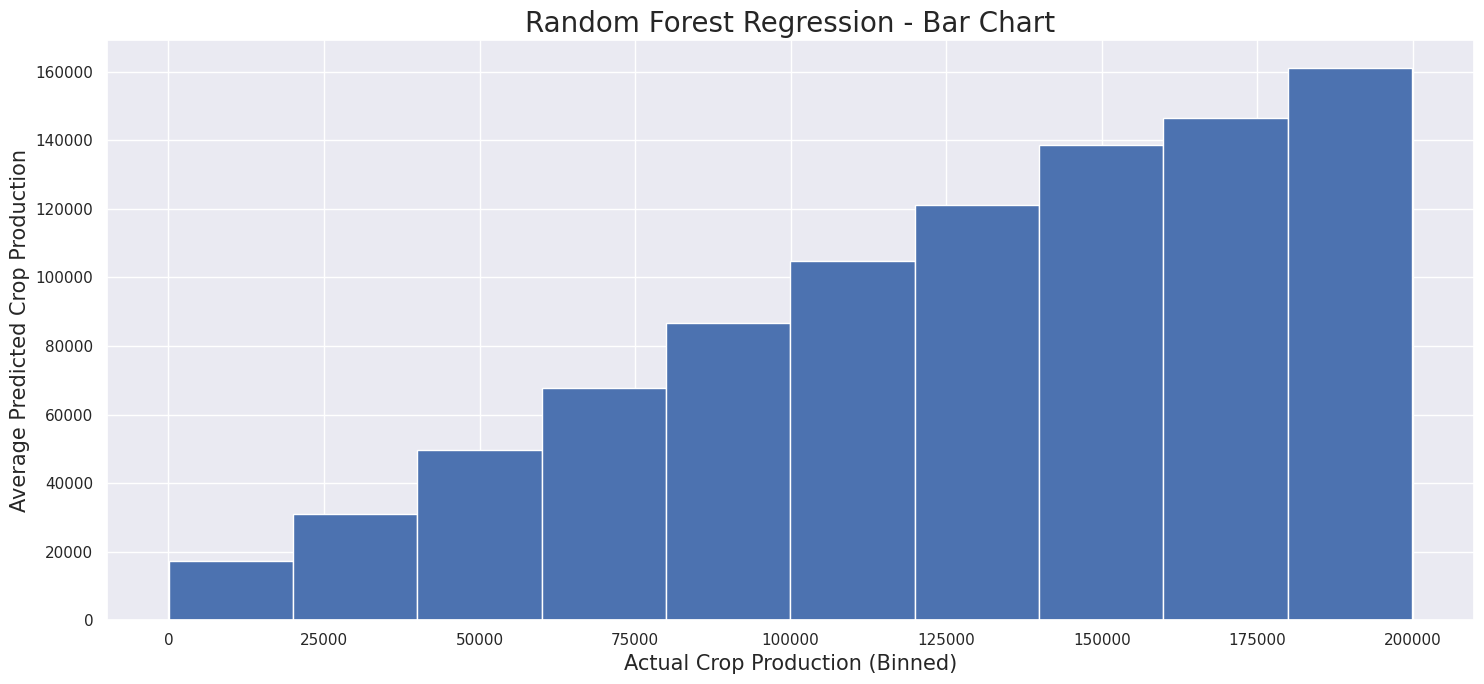

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test and rfr_pred are your actual and predicted values
plt.figure(figsize=(15,7))

# Define the number of bins for grouping actual values
num_bins = 10

# Create bins using np.linspace
bins = np.linspace(min(y_test), max(y_test), num_bins + 1)

# Group actual values into bins and calculate average predicted value for each bin
binned_data = [[] for _ in range(num_bins)]
for actual, predicted in zip(y_test, rfr_pred):
    bin_index = np.digitize(actual, bins) - 1
    if 0 <= bin_index < num_bins:
        binned_data[bin_index].append(predicted)

avg_predicted = [np.mean(data) if data else 0 for data in binned_data]

# Plot the bar chart
plt.bar(bins[:-1], avg_predicted, width=(bins[1] - bins[0]), align='edge')

plt.title('Random Forest Regression - Bar Chart', fontsize=20)
plt.xlabel('Actual Crop Production (Binned)', fontsize=15)
plt.ylabel('Average Predicted Crop Production', fontsize=15)

plt.tight_layout()
plt.show()

Random Forest Regressor Model got a great prediction r2 score equals 0.940 which is very good
Mean Absolute Error is 7262.364 that means that the different between actual mean and predicted mean is 7262.364
RMSE is 11958.180 which is very good

**Evaluation Models**

In [ ]:
df_models.sort_values(by="R2 Score")

,Model,MAE,MEDAE,MSE,RMSE,Max Error,R2 Score,EVS,MAPE
0,SGDRegressor,16437.154254,11441.000246,5.194879e+08,22792.277703,130276.763512,0.781602,0.781685,0.646446
1,RandomForestRegressor,7262.363998,4096.389820,1.429981e+08,11958.179567,127929.039904,0.939882,0.939905,0.312293


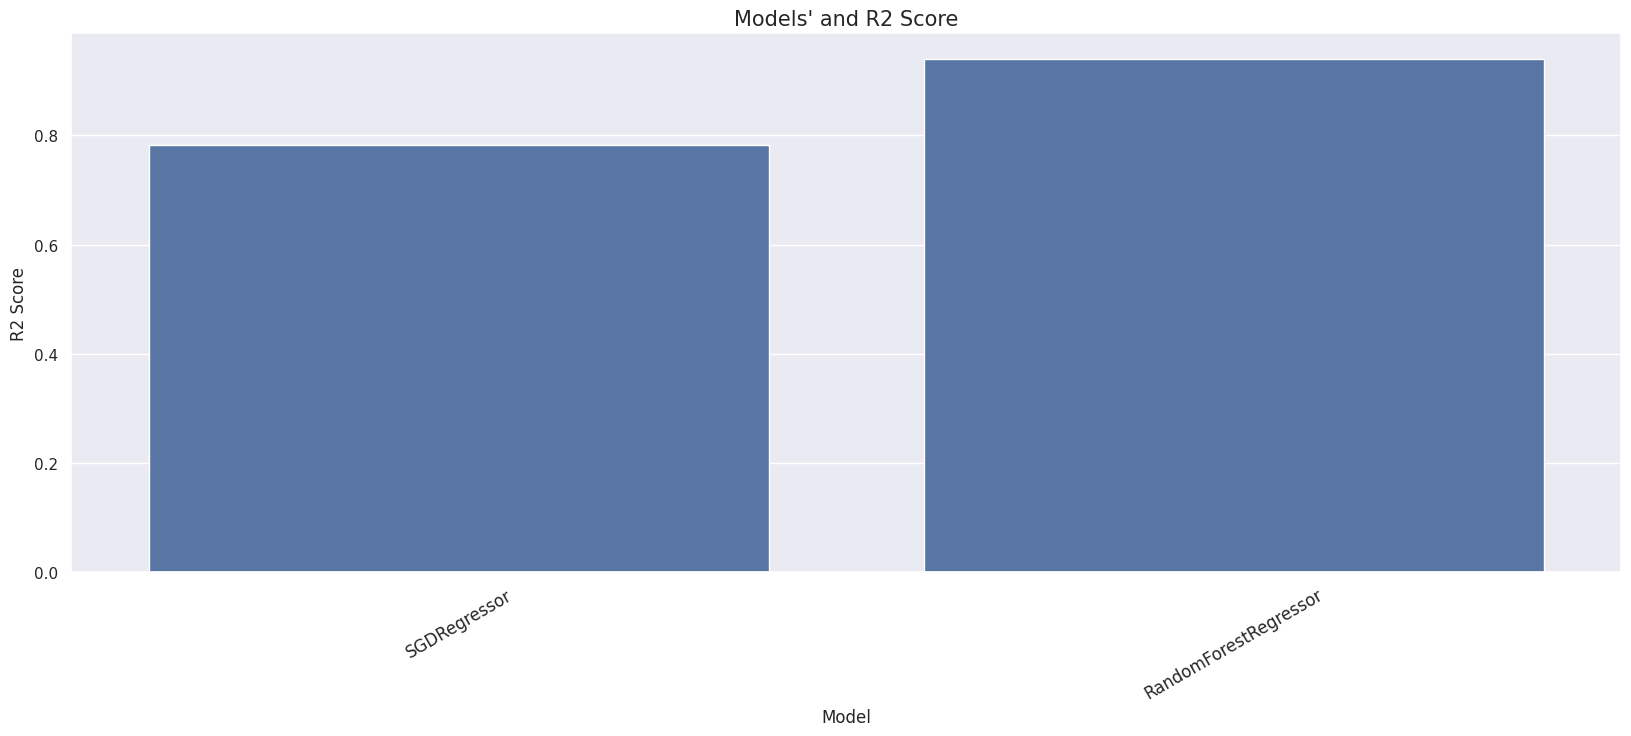

In [ ]:
plt.figure(figsize=(20,7))
sns.barplot(x=df_models.Model, y=df_models['R2 Score'])
plt.title("Models' and R2 Score", size=15)
plt.xticks(rotation=30, size=12)
plt.show()

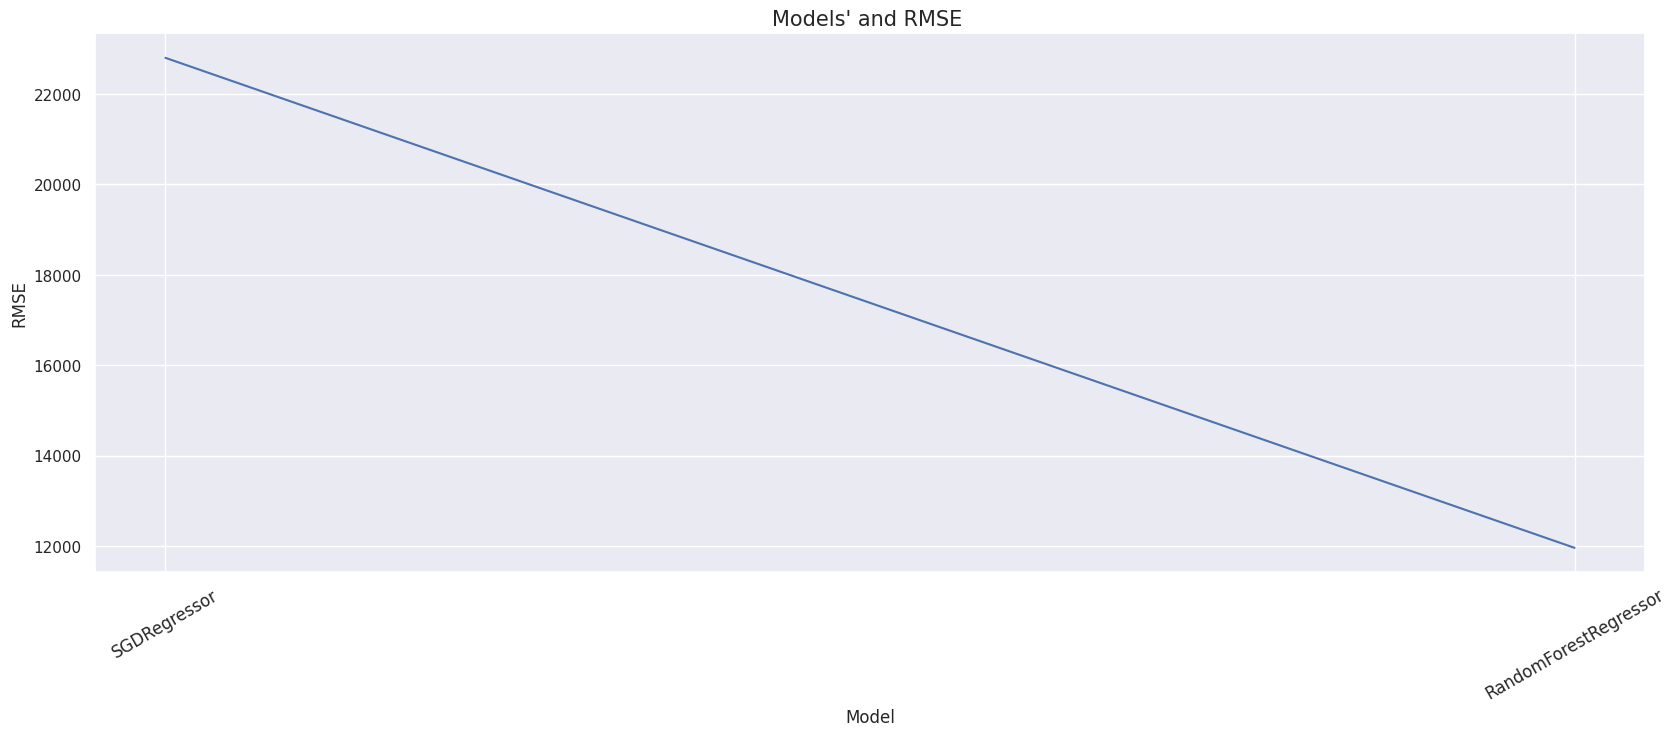

In [ ]:
plt.figure(figsize=(20,7))
sns.lineplot(x=df_models.Model, y=df_models.RMSE)
plt.title("Models' and RMSE ", size=15)
plt.xticks(rotation=30, size=12)
plt.show()

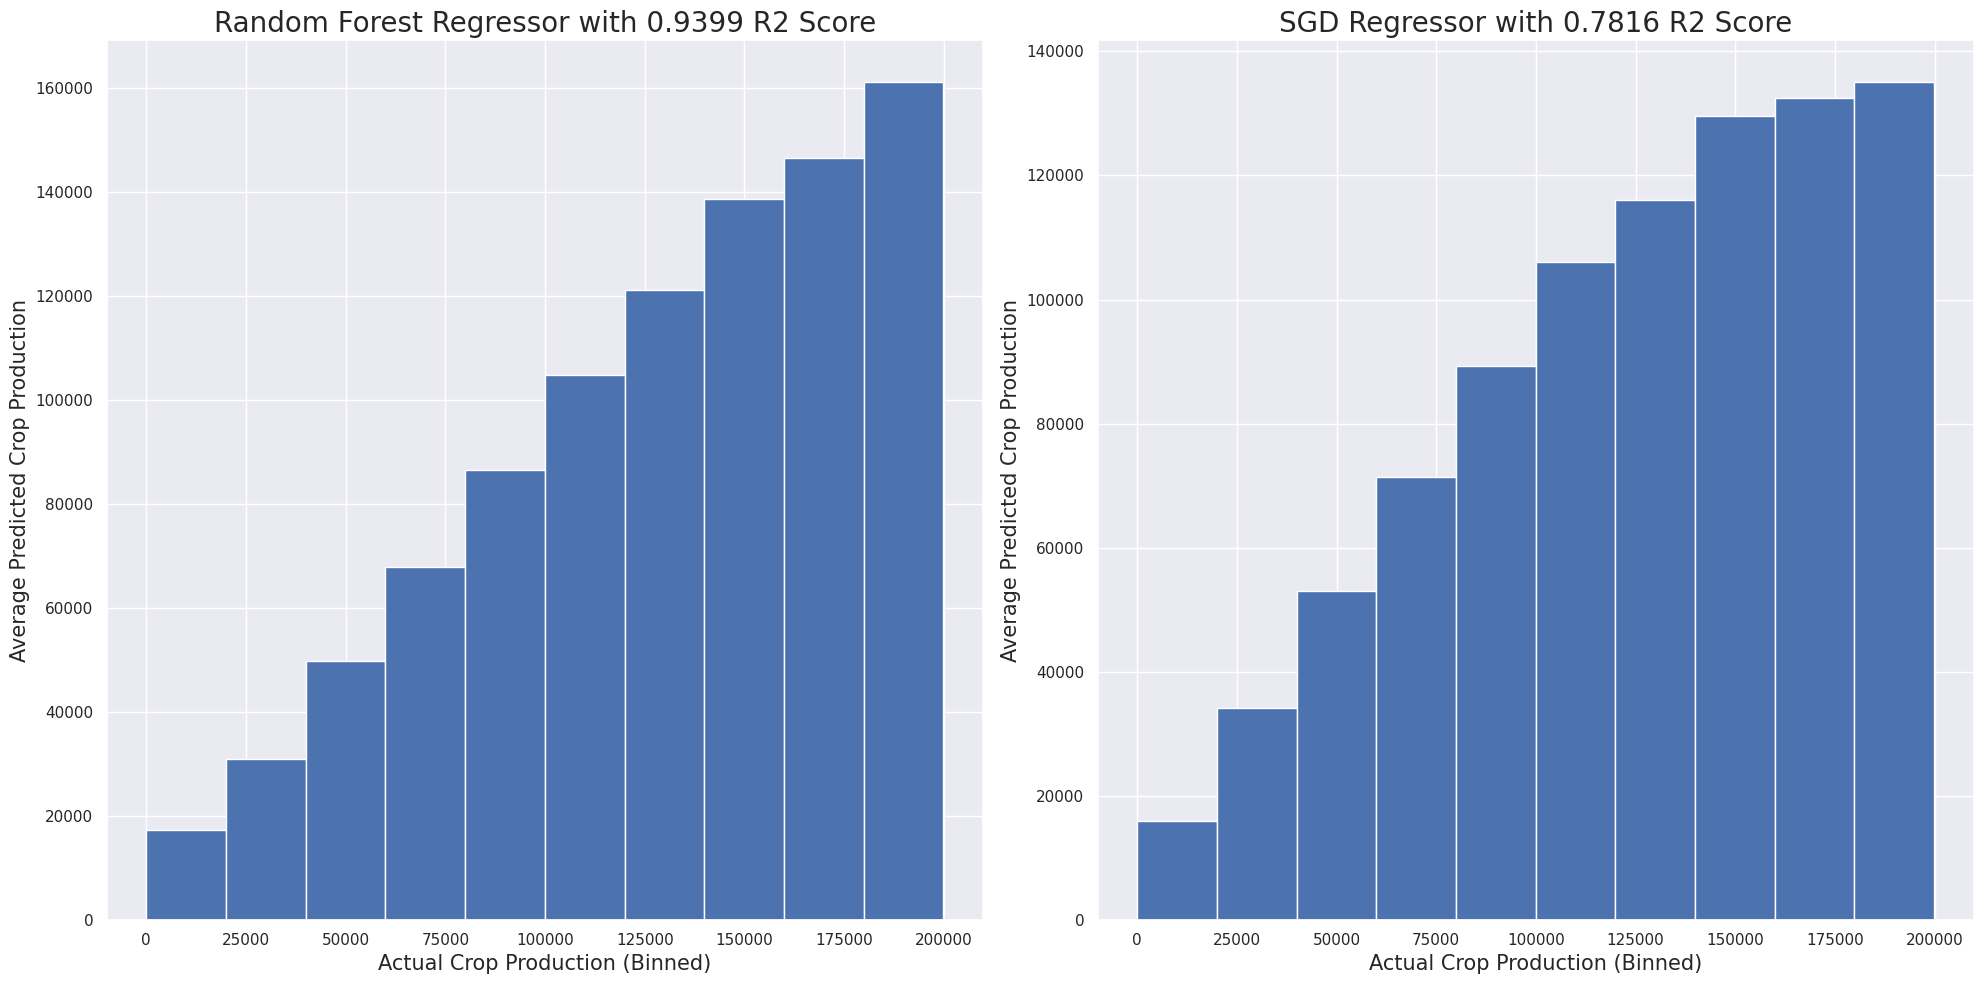

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ... (rest of your code) ...

#make subplot for 2 plots
fig, plotcanvas = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Random Forest Regressor subplot (changed to bar chart)
num_bins = 10  # Number of bins for grouping data
bins = np.linspace(min(y_test), max(y_test), num_bins + 1)  # Create bins

# Function to calculate average predicted values for bins
def calculate_avg_predicted(actual_values, predicted_values, bins):
    binned_data = [[] for _ in range(len(bins) - 1)]
    for actual, predicted in zip(actual_values, predicted_values):
        bin_index = np.digitize(actual, bins) - 1
        if 0 <= bin_index < len(bins) - 1:
            binned_data[bin_index].append(predicted)
    avg_predicted = [np.mean(data) if data else 0 for data in binned_data]
    return avg_predicted

# Random Forest Regressor bar chart
avg_predicted_rfr = calculate_avg_predicted(y_test, rfr_pred, bins)
plotcanvas[0].bar(bins[:-1], avg_predicted_rfr, width=(bins[1] - bins[0]), align='edge')
c = df_models.loc[df_models['Model'] == 'RandomForestRegressor', 'R2 Score'].values[0]
plotcanvas[0].set_title(f'Random Forest Regressor with {c:0.4f} R2 Score', fontsize=20)
plotcanvas[0].set_xlabel('Actual Crop Production (Binned)', fontsize=15)
plotcanvas[0].set_ylabel('Average Predicted Crop Production', fontsize=15)


# SGD Regressor subplot (changed to bar chart)
avg_predicted_sgd = calculate_avg_predicted(y_test, sgd_pred, bins)
plotcanvas[1].bar(bins[:-1], avg_predicted_sgd, width=(bins[1] - bins[0]), align='edge')
c = df_models.loc[df_models['Model'] == 'SGDRegressor', 'R2 Score'].values[0]
plotcanvas[1].set_title(f'SGD Regressor with {c:0.4f} R2 Score', fontsize=20)
plotcanvas[1].set_xlabel('Actual Crop Production (Binned)', fontsize=15)
plotcanvas[1].set_ylabel('Average Predicted Crop Production', fontsize=15)


plt.tight_layout()
plt.show()

We Can say the top 3 Models are linear regression, Random Forest Regressor with R2 Score Equals 0.78,0.93 respectively